In [1]:
import pandas as pd

df = pd.read_csv("active_occ_licenses_2025.csv")

print(df.shape)
print(df.columns.tolist())
df.head()

(10896, 20)
['BusinessAddress', 'BusinessName', 'BusinessPhone', 'BusinessStartDate', 'BusinessType', 'BusinessLicenseNumber', 'City', 'OwnerName', 'State', 'StreetDirection', 'StreetName', 'StreetNumber', 'StreetSuffix', 'Suite', 'Zip', 'LocationX', 'LocationY', 'Latitude', 'Longitude', 'Location']


,BusinessAddress,BusinessName,BusinessPhone,BusinessStartDate,BusinessType,BusinessLicenseNumber,City,OwnerName,State,StreetDirection,StreetName,StreetNumber,StreetSuffix,Suite,Zip,LocationX,LocationY,Latitude,Longitude,Location
0,4532 MAGAZINE ST,OCTAVIA ART AND FILM,504-616-6202,2008-03-14,Art Dealers,102680731,NEW ORLEANS,PAMELA M BRYAN,LA,NaN,MAGAZINE,4532,ST,NaN,70115-1543,3670385.57,518674.04,29.920506,-90.103601,POINT (-90.10360111114565 29.92050622841199)
1,24740 MILL VALLEY WAY,ALLOHN DESIGNS,NaN,2018-05-14,Special Events-Other (Vendor),105032410,CARSON,AGBENYA ALLOHN,CA,NaN,MILL VALLEY,24740,WAY,NaN,90745-6454,0.00,0.00,0.000000,0.000000,POINT (0 0)
2,2555 VALENCE ST,LOUANGER,(503) 867-6923,2025-02-01,Bed & Breakfast Inns,106124978,NEW ORLEANS,LOUANGER,LA,NaN,VALENCE,2555,ST,NaN,70115-6341,3669444.11,524212.50,29.935763,-90.106386,POINT (-90.10638567129016 29.935762975538836)
3,650 S ROCHEBLAVE ST,NOLA FROZEN TIME PHOTOGRAPHY,(504) 892-3220,2025-03-27,"Photography Studios, Portrait",106022854,NEW ORLEANS,NOLA FROZEN TIME PHOTOGRAPHY L,LA,S,ROCHEBLAVE,650,ST,NaN,70119-7439,3674709.28,532565.42,29.958575,-90.089477,POINT (-90.0894771646702 29.958574674015836)
4,3317 MAGAZINE ST,A VARGAS BODY SHOP,504-891-2606,1980-02-03,"Automotive Body, Paint & Interior Repair & Mai...",101117693,NEW ORLEANS,A VARGAS BODY SHOP INC,LA,NaN,MAGAZINE,3317,ST,NaN,70115-2410,3675193.08,519773.31,29.923386,-90.088388,POINT (-90.08838832801506 29.923386122945704)


## Inspecting 

In [2]:
df.info()
df.isnull().sum()
df.describe(include='all')
df.duplicated().sum()
df[df.duplicated()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10896 entries, 0 to 10895
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BusinessAddress        10896 non-null  object 
 1   BusinessName           8014 non-null   object 
 2   BusinessPhone          9594 non-null   object 
 3   BusinessStartDate      10896 non-null  object 
 4   BusinessType           10894 non-null  object 
 5   BusinessLicenseNumber  10896 non-null  int64  
 6   City                   10896 non-null  object 
 7   OwnerName              10896 non-null  object 
 8   State                  10896 non-null  object 
 9   StreetDirection        1382 non-null   object 
 10  StreetName             10855 non-null  object 
 11  StreetNumber           10858 non-null  object 
 12  StreetSuffix           10768 non-null  object 
 13  Suite                  1429 non-null   object 
 14  Zip                    10896 non-null  object 
 15  Lo

,BusinessAddress,BusinessName,BusinessPhone,BusinessStartDate,BusinessType,BusinessLicenseNumber,City,OwnerName,State,StreetDirection,StreetName,StreetNumber,StreetSuffix,Suite,Zip,LocationX,LocationY,Latitude,Longitude,Location
76,2139 BARONNE ST,NOLAVORE'S A LA CARTE MARKET,504-914-3161,2010-10-01,Caterers,102810856,NEW ORLEANS,NOLAVORE LLC,LA,NaN,BARONNE,2139,ST,NaN,70113-1515,3677019.22,524574.25,29.936532,-90.082458,POINT (-90.08245844709198 29.936532461434286)


## Column Name Cleaning

In [3]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index(['businessaddress', 'businessname', 'businessphone', 'businessstartdate',
       'businesstype', 'businesslicensenumber', 'city', 'ownername', 'state',
       'streetdirection', 'streetname', 'streetnumber', 'streetsuffix',
       'suite', 'zip', 'locationx', 'locationy', 'latitude', 'longitude',
       'location'],
      dtype='object')

In [4]:
df.rename(columns={
    'businessaddress': 'business_address',
    'businessname': 'business_name',
    'businessphone': 'business_phone',
    'businessstartdate': 'business_start_date',
    'businesstype': 'business_type',
    'businesslicensenumber': 'business_license_number',
    'ownername': 'owner_name',
    'streetdirection': 'street_direction',
    'streetname': 'street_name',
    'streetnumber': 'street_number',
    'streetsuffix': 'street_suffix',
    'locationx': 'location_x',
    'locationy': 'location_y'
}, inplace=True)

df.columns

Index(['business_address', 'business_name', 'business_phone',
       'business_start_date', 'business_type', 'business_license_number',
       'city', 'owner_name', 'state', 'street_direction', 'street_name',
       'street_number', 'street_suffix', 'suite', 'zip', 'location_x',
       'location_y', 'latitude', 'longitude', 'location'],
      dtype='object')

## Null & Duplicate Checks

Checking for null and duplicate values in key columns that are relevant to business identification and classification. These fields are important for analysis & may need further handling if missing data is found. 

In [5]:
df = df[df['business_name'].notnull()]

In [6]:
df[['business_name', 'suite']].isnull().sum()

business_name       0
suite            6997
dtype: int64

In [7]:
df[['business_name', 'business_license_number', 'business_start_date', 'business_type']].isnull().sum()

business_name              0
business_license_number    0
business_start_date        0
business_type              1
dtype: int64

## Duplicate Check

The business "NOLAVORE'S A LA CARTE MARKET" appears three times in the dataset with identical location & ownership details. However, due to variations in business type and license number, these records likely indicate multiple legitimate registrations for distinct services and are therefore kept in the dataset. 

In [8]:
df[df['business_name'] == "NOLAVORE'S A LA CARTE MARKET"]

,business_address,business_name,business_phone,business_start_date,business_type,business_license_number,city,owner_name,state,street_direction,street_name,street_number,street_suffix,suite,zip,location_x,location_y,latitude,longitude,location
75,2139 BARONNE ST,NOLAVORE'S A LA CARTE MARKET,504-914-3161,2010-10-01,Caterers,102810856,NEW ORLEANS,NOLAVORE LLC,LA,NaN,BARONNE,2139,ST,NaN,70113-1515,3677019.22,524574.25,29.936532,-90.082458,POINT (-90.08245844709198 29.936532461434286)
76,2139 BARONNE ST,NOLAVORE'S A LA CARTE MARKET,504-914-3161,2010-10-01,Caterers,102810856,NEW ORLEANS,NOLAVORE LLC,LA,NaN,BARONNE,2139,ST,NaN,70113-1515,3677019.22,524574.25,29.936532,-90.082458,POINT (-90.08245844709198 29.936532461434286)
5488,2139 BARONNE ST,NOLAVORE'S A LA CARTE MARKET,504-914-3161,2024-01-01,Convenience Stores,105069380,NEW ORLEANS,NOLAVORE LLC,LA,NaN,BARONNE,2139,ST,NaN,70113-1515,3677019.22,524574.25,29.936532,-90.082458,POINT (-90.08245844709198 29.936532461434286)


## Dropping Rows with Missing Name 

Rows that are missing 'business_name' were dropped, as this field is critical for identifying and grouping businesses in the dataset. The 'suit' column has a large number of values. Not all business have suites, these missing values are expected & will be kept. 

In [9]:
df[df['business_name'].isnull()].head()

,business_address,business_name,business_phone,business_start_date,business_type,business_license_number,city,owner_name,state,street_direction,street_name,street_number,street_suffix,suite,zip,location_x,location_y,latitude,longitude,location


## Changing business_start_date to datetime

In [10]:
df = df.copy()
df['business_start_date'] = pd.to_datetime(df['business_start_date'], errors='coerce')

## Extracting Year

In [11]:
df['business_start_year'] = df['business_start_date'].dt.year
df['business_start_year'].value_counts().sort_index()

business_start_year
1900      7
1937      1
1958      1
1962      1
1963      7
       ... 
2022    289
2023    372
2024    474
2025    839
2026      2
Name: count, Length: 68, dtype: int64

## Number of Businesses Starting Over the Years

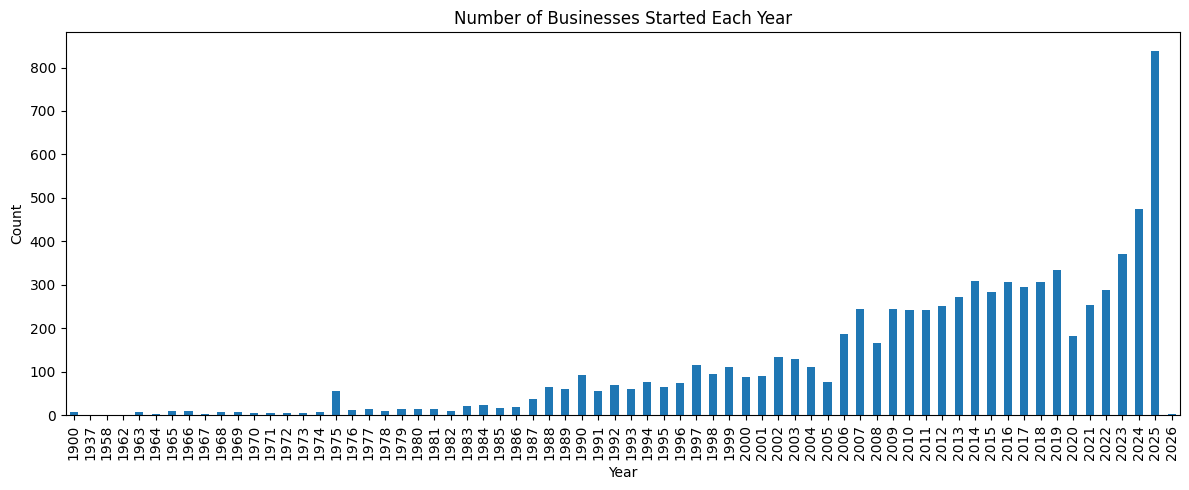

In [12]:
import matplotlib.pyplot as plt

df['business_start_year'].value_counts().sort_index().plot(kind='bar', figsize=(12,5))
plt.title('Number of Businesses Started Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Recent Years: (2000-2025)

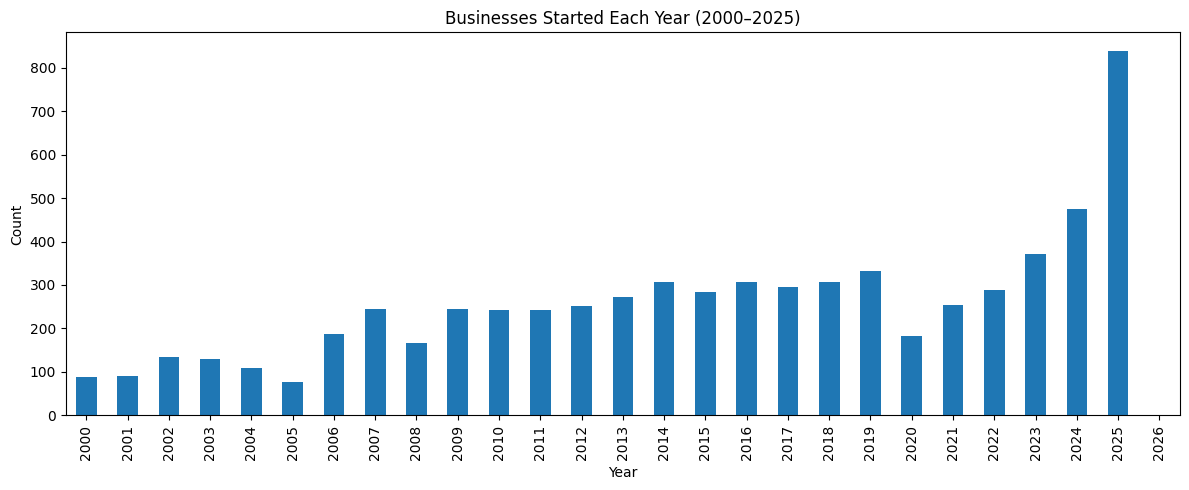

In [13]:
recent = df[df['business_start_year'] >= 2000]

recent['business_start_year'].value_counts().sort_index().plot(kind='bar', figsize=(12, 5))

plt.title('Businesses Started Each Year (2000–2025)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig("business_starts_trend.png")
plt.show()

In [14]:
plt.savefig("business_starts_trend.png")

<Figure size 640x480 with 0 Axes>

## Sample Column Values 

In [15]:
for col in df.columns:
    sample_value = df[col].dropna().iloc[0] if not df[col].dropna().empty else "No data"
    print(f"- **{col}**: Example value → {sample_value}")

- **business_address**: Example value → 4532 MAGAZINE ST
- **business_name**: Example value → OCTAVIA ART AND FILM
- **business_phone**: Example value → 504-616-6202
- **business_start_date**: Example value → 2008-03-14 00:00:00
- **business_type**: Example value → Art Dealers
- **business_license_number**: Example value → 102680731
- **city**: Example value → NEW ORLEANS
- **owner_name**: Example value → PAMELA M BRYAN
- **state**: Example value → LA
- **street_direction**: Example value → S
- **street_name**: Example value → MAGAZINE
- **street_number**: Example value → 4532
- **street_suffix**: Example value → ST
- **suite**: Example value → 102
- **zip**: Example value → 70115-1543
- **location_x**: Example value → 3670385.57
- **location_y**: Example value → 518674.04
- **latitude**: Example value → 29.92050622841199
- **longitude**: Example value → -90.10360111114564
- **location**: Example value → POINT (-90.10360111114565 29.92050622841199)
- **business_start_year**: Example va

## Understanding the Dataset Columns

To better interpet the dataseet, this section provides descriptions of each column along with a sample value. This helps clarify the structure of the data before performing any analysis or cleaning. 

### Column Description

- **BusinessAddress**: Full street address of the buisness
  location. _e.g., "4532 MAGAZINE ST"_

---

- **BusinessName**: Registered name of the business.
  _e.g., "OCTAVIA ART AND FILM"_

---

- **BusinessPhone**: Business contact number.
  _e.g., "504-616-6202"_

---

- **BusinessStartDate**: Official start date of business
  operations. _e.g., "2008-03-14"_

---

- **BusinessType**: Classification of the business activity or
  industry. _e.g., "Art Dealers"_

---

- **BusinessLicenseNumber**: Unique license ID assigned by the city. _e.g., "102680731"_

---

- **City**: City where the business is registered.
  _e.g., "NEW ORLEANS"_

---

- **OwnerName**: Full name of the business owner.
  _e.g., "PAMELA M BRYAN"_

---

- **State**: State abbreviation.
  _e.g., "LA"_

---

- **StreetDirection**: Compass direction used in the street address. _e.g., "S"_

---

- **StreetName**: Name of the street without number or direction.
 _e.g., "MAGAZINE"_

---

- **StreetNumber**: Number portion of the address.
  _e.g., "4532"_

---

- **StreetSuffix**: Type of road or street abbreviation.
  _e.g., "ST"_

---

- **Suite**: Internal office or suite number, if applicable.
  _e.g., "207"_

---

- **Zip**: ZIP code including any extended digits.
  _e.g., "70115-1543"_

---

- **LocationX / LocationY**: Internal coordinate reference system
  values.

---

- **Lattitude / Longitude**: Georgraphic location of the business.
  _e.g., (29.0205, -99.1036)

---

- **Location**: GIS-style point reference for mapping.
  _e.g., "POINT (-90.1036 29.9205)"_

## Business Trends by Year

Visualizing the number of new businesses registered each year providing insights into trends over time, including spikes/declines in activity. 

In [16]:
df['start_year'] = df['business_start_date'].dt.year

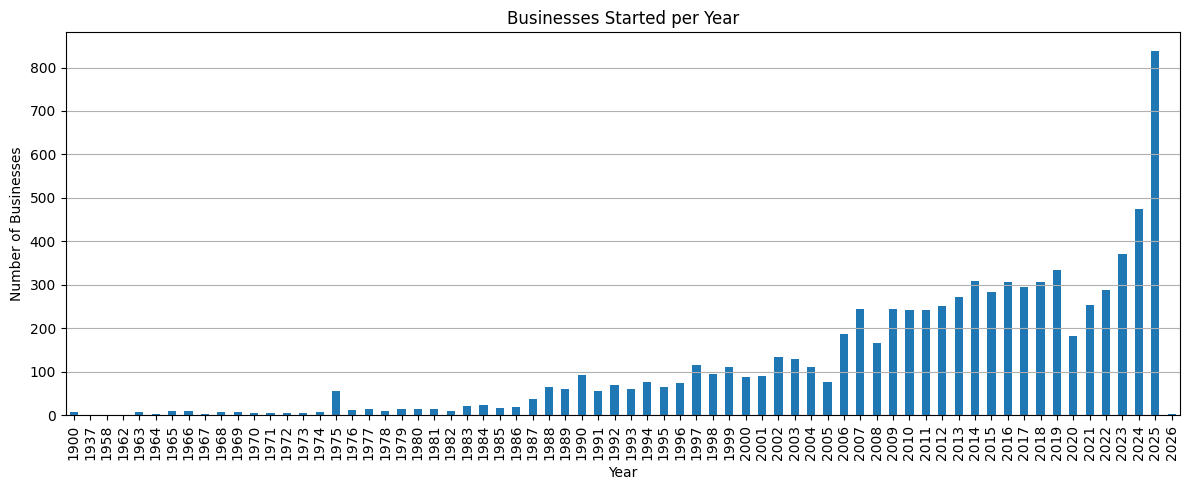

In [17]:
df['start_year'].value_counts().sort_index().plot(
    kind='bar', 
    figsize=(12,5), 
    title='Businesses Started per Year')
plt.xlabel('Year')
plt.ylabel('Number of Businesses')
plt.grid(axis='y')
plt.tight_layout()
plt.show()